In [1]:
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [2]:
# File to Load
# Read the City and Ride Data
city_df = pd.read_csv('city_data.csv')
ride_df = pd.read_csv('ride_data.csv')

In [3]:
# Combine the data into a single dataset
city_df = pd.DataFrame(city_df)
city_df.head(10)

,city,driver_count,type
0,Richardfort,38,Urban
1,Williamsstad,59,Urban
2,Port Angela,67,Urban
3,Rodneyfort,34,Urban
4,West Robert,39,Urban
5,West Anthony,70,Urban
6,West Angela,48,Urban
7,Martinezhaven,25,Urban
8,Karenberg,22,Urban
9,Barajasview,26,Urban


In [4]:
# Combine the data into a single dataset
ride_df = pd.DataFrame(ride_df)
ride_df.head(10)

,city,date,fare,ride_id
0,Lake Jonathanshire,2018-01-14 10:14:22,13.83,5739410935873
1,South Michelleport,2018-03-04 18:24:09,30.24,2343912425577
2,Port Samanthamouth,2018-02-24 04:29:00,33.44,2005065760003
3,Rodneyfort,2018-02-10 23:22:03,23.44,5149245426178
4,South Jack,2018-03-06 04:28:35,34.58,3908451377344
5,South Latoya,2018-03-11 12:26:48,9.52,1994999424437
6,New Paulville,2018-02-27 11:17:56,43.25,793208410091
7,Simpsonburgh,2018-04-26 00:43:24,35.98,111953927754
8,South Karenland,2018-01-08 03:28:48,35.09,7995623208694
9,North Jasmine,2018-03-09 06:26:29,42.81,5327642267789


In [5]:
# Combine the data into a single dataset
# Display the data table for preview
merge_df = pd.merge(city_df, ride_df, on='city', how='outer')
merge_df = merge_df.groupby(['city', "type"])
merge_df = pd.DataFrame(round(merge_df.mean(),3))
merge_df = merge_df.reset_index()
merge_df.head()

,city,type,driver_count,fare,ride_id
0,Amandaburgh,Urban,12.0,24.642,5.359336e+12
1,Barajasview,Urban,26.0,25.332,4.676968e+12
2,Barronchester,Suburban,11.0,36.422,4.460796e+12
3,Bethanyland,Suburban,22.0,32.956,5.842550e+12
4,Bradshawfurt,Rural,7.0,40.064,3.735294e+12


In [6]:
city_count = ride_df.copy()
city_count = city_count.groupby('city')['ride_id'].count()
city_count = pd.DataFrame(city_count)
city_count = city_count.reset_index()
city_count = city_count.rename(columns={'ride_id':'Total number of rides'})
city_count.head()

,city,Total number of rides
0,Amandaburgh,18
1,Barajasview,22
2,Barronchester,16
3,Bethanyland,18
4,Bradshawfurt,10


In [7]:
merge_df = pd.merge(merge_df,city_count, on='city')
merge_df = merge_df.loc[:,['city', 'type', 'Total number of rides', 'driver_count', 'fare',]]
merge_df = pd.DataFrame(merge_df)
merge_df.rename(columns={'city':'City',
                   'type':'Types',
                   'fare':'Average fare',
                   'driver_count':'Total drivers'
                  })
merge_df.head()

,city,type,Total number of rides,driver_count,fare
0,Amandaburgh,Urban,18,12.0,24.642
1,Barajasview,Urban,22,26.0,25.332
2,Barronchester,Suburban,16,11.0,36.422
3,Bethanyland,Suburban,18,22.0,32.956
4,Bradshawfurt,Rural,10,7.0,40.064


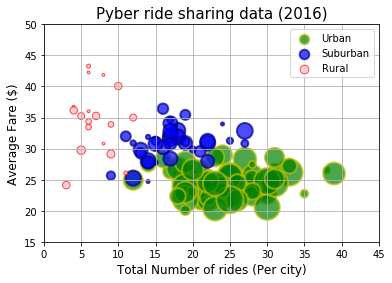

In [8]:
# Obtain the x and y coordinates for each of the three city types
# Build the scatter plots for each city types
urb = merge_df.type.str.count(r'Urban')
sub = merge_df.type.str.count(r'Suburban')
rur = merge_df.type.str.count(r'Rural')
x = (merge_df['Total number of rides'] * urb) 
y = (merge_df['fare'] * urb)
plt.scatter(x, y, alpha=0.7, c='g', edgecolors='y', s = merge_df['driver_count']*10, label="Urban", linewidths=2)
x = (merge_df['Total number of rides'] * sub)
y = (merge_df['fare'] * sub)
plt.scatter(x, y, alpha=0.7, c='b', edgecolors='darkblue', s = merge_df['driver_count']*10, label='Suburban', linewidths=2)
x = (merge_df['Total number of rides'] * rur)
y = (merge_df['fare'] * rur)
plt.scatter(x, y, alpha=0.7, c='pink', edgecolors='r', s = merge_df['driver_count']*8, label='Rural', linewidths=1)
plt.ylim(15, 50)
plt.xlim(0, 45)
plt.ylabel('Average Fare ($)', fontsize = 12)
plt.xlabel('Total Number of rides (Per city)', fontsize = 12)
plt.title("Pyber ride sharing data (2016)", fontsize = 15)
plt.grid()

# Create a legend
plt.legend(handles=None, loc="best", scatterpoints=1, fontsize=10, markerscale=0.5)

# Show Figure
plt.show()

In [9]:
# created dataframe for first pie chart
pie_1df = pd.merge(city_df, ride_df, on='city')
pie_1df = pie_1df.groupby('type')['fare'].sum()
pie_1df = pd.DataFrame(pie_1df)
pie_1df['% of total fare'] = pie_1df['fare']/pie_1df['fare'].sum()*100
pie_1df = pie_1df.reset_index()
pie_1df

,type,fare,% of total fare
0,Rural,4327.93,6.811493
1,Suburban,19356.33,30.463872
2,Urban,39854.38,62.724635


([<matplotlib.patches.Wedge at 0x1e3c55c95c0>,
 [Text(0.5119943820808126, 0.9735819188531014, 'Rural'),
  Text(-0.697555769427504, 0.850538622602409, 'Suburban'),
  Text(0.5237992817956594, -1.023784309505841, 'Urban')],
 [Text(0.27926966295317046, 0.5310446830107826, '6.8%'),
  Text(-0.38048496514227487, 0.4639301577831321, '30.5%'),
  Text(0.2960604636236335, -0.5786606966772144, '62.7%')])

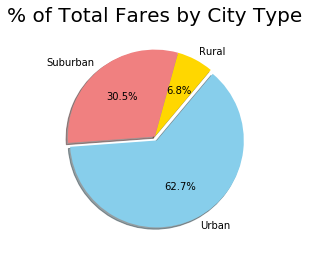

In [10]:
# Pie chart
types = pie_1df['type']
total_fare = pie_1df['% of total fare']
colors = ["gold", "lightcoral", "skyblue"]
explode = (0, 0, 0.05)
plt.title('% of Total Fares by City Type', fontsize=20)
plt.pie(total_fare, explode=explode, labels=types, colors=colors, autopct="%1.1f%%", shadow=True, startangle=50)

In [11]:
# created dataframe for second pie chart
pie_2df = merge_df.groupby('type')['Total number of rides'].sum()
pie_2df = pd.DataFrame(pie_2df)
pie_2df = pie_2df.reset_index()
pie_2df['% of total rides'] = pie_2df['Total number of rides']/pie_2df['Total number of rides'].sum()* 100
pie_2df

,type,Total number of rides,% of total rides
0,Rural,125,5.263158
1,Suburban,625,26.315789
2,Urban,1625,68.421053


([<matplotlib.patches.Wedge at 0x1e3c561b518>,
 [Text(0.5587274574071891, 0.9475355551847634, 'Rural'),
  Text(-0.48765008040839103, 0.98600070947119, 'Suburban'),
  Text(0.3331956250631502, -1.100672828518437, 'Urban')],
 [Text(0.30476043131301217, 0.5168375755553255, '5.3%'),
  Text(-0.26599095295003145, 0.5378185688024673, '26.3%'),
  Text(0.1883279619922153, -0.6221194248147688, '68.4%')])

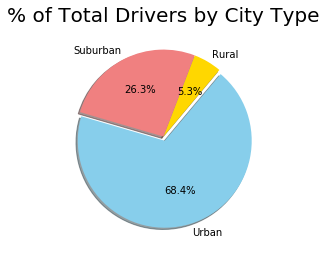

In [12]:
# Pie Chart
types = pie_2df['type']
ride_count = pie_2df['% of total rides']
colors = ["gold", "lightcoral", "skyblue"]
plt.title('% of Total Drivers by City Type', fontsize=20)
explode = (0, 0, 0.05)
plt.pie(ride_count, explode=explode, labels=types, colors=colors, autopct="%1.1f%%", shadow=True, startangle=50)

In [13]:
# created dataframe for third pie chart
pie_3df = merge_df.groupby('type')['driver_count'].sum()
pie_3df = pd.DataFrame(pie_3df)
pie_3df = pie_3df.reset_index()
pie_3df['% of total rides'] = pie_3df['driver_count']/pie_3df['driver_count'].sum()* 100
pie_3df

,type,driver_count,% of total rides
0,Rural,78.0,2.623613
1,Suburban,490.0,16.481668
2,Urban,2405.0,80.894719


([<matplotlib.patches.Wedge at 0x1e3c55807f0>,
 [Text(0.6352907543769717, 0.8980009228297811, 'Rural'),
  Text(0.017047564552569224, 1.0998678923138117, 'Suburban'),
  Text(-0.112429961980117, -1.1444909364643958, 'Urban')],
 [Text(0.3465222296601664, 0.48981868517988053, '2.6%'),
  Text(0.009298671574128668, 0.5999279412620789, '16.5%'),
  Text(-0.06354736981484872, -0.6468861814798759, '80.9%')])

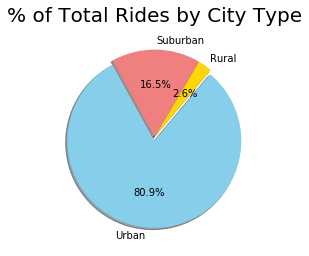

In [14]:
# Pie Chart
types = pie_3df['type']
ride_count = pie_3df['% of total rides']
colors = ["gold", "lightcoral", "skyblue"]
plt.title('% of Total Rides by City Type', fontsize=20)
explode = (0, 0, 0.05)
plt.pie(ride_count, explode=explode, labels=types, colors=colors, autopct="%1.1f%%", shadow=True, startangle=50)